# CRIME PREDICTION USING MACHINE LEARNING AND DEEP LEARNING of CHICAGO

In [136]:
pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [137]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from pdpbox.pdp import pdp_isolate, pdp_plot
import gc
import psutil
import os
from sklearn.metrics import mean_absolute_error 

In [138]:
process = psutil.Process(os.getpid())
gc.collect()
print('memory starting', process.memory_info().rss)

memory starting 444841984


# Loading Data

In [139]:
df= pd.read_csv('/Chicago_Crimes_2022.csv', sep=",")

In [140]:
#Check size Data
print(df.shape)

(27330, 22)


In [141]:
gc.collect()
print('memory after loading data', process.memory_info().rss)

memory after loading data 471945216


In [142]:
#Describe Numeric Features
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.732800e+04,27330.000000,27330.000000,27326.000000,27330.000000,2.682100e+04,2.682100e+04,27330.0,26821.000000,26821.000000
mean,1.259688e+07,1149.462459,11.265862,23.263888,36.651299,1.165029e+06,1.886677e+06,2022.0,41.844629,-87.669902
std,6.325707e+05,700.738802,7.005203,14.027202,21.516367,1.653367e+04,3.152886e+04,0.0,0.086709,0.060200
min,2.654400e+04,111.000000,1.000000,1.000000,1.000000,1.091242e+06,1.814333e+06,2022.0,41.645288,-87.939733
25%,1.261771e+07,612.000000,6.000000,10.000000,23.000000,1.153411e+06,1.859233e+06,2022.0,41.769013,-87.712081
50%,1.262871e+07,1031.000000,10.000000,24.000000,32.000000,1.167020e+06,1.892852e+06,2022.0,41.861735,-87.662707
75%,1.263957e+07,1722.000000,17.000000,34.000000,53.000000,1.176531e+06,1.909028e+06,2022.0,41.906272,-87.627691
max,1.265508e+07,2535.000000,31.000000,50.000000,77.000000,1.204787e+06,1.951493e+06,2022.0,42.022536,-87.525783


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27330 entries, 0 to 27329
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    27328 non-null  float64
 1   Case Number           27330 non-null  object 
 2   Date                  27330 non-null  object 
 3   Block                 27330 non-null  object 
 4   IUCR                  27330 non-null  object 
 5   Primary Type          27330 non-null  object 
 6   Description           27330 non-null  object 
 7   Location Description  27246 non-null  object 
 8   Arrest                27330 non-null  bool   
 9   Domestic              27330 non-null  bool   
 10  Beat                  27330 non-null  int64  
 11  District              27330 non-null  int64  
 12  Ward                  27326 non-null  float64
 13  Community Area        27330 non-null  int64  
 14  FBI Code              27330 non-null  object 
 15  X Coordinate       

In [200]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12607375.0,JF129808,2022-01-31 03:00:00,053XX S PULASKI RD,860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,0,0,...,23.0,62,6,1150608.0,1868922.0,2022,02-07-2022 15:51,41.796216,-87.723246,"(41.796216157, -87.723245665)"
1,12606306.0,JF129787,2022-01-31 01:20:00,021XX W DEVON AVE,460,BATTERY,SIMPLE,COMMERCIAL / BUSINESS OFFICE,0,0,...,50.0,2,08B,1160693.0,1942466.0,2022,02-07-2022 15:51,41.997825,-87.684223,"(41.997824552, -87.684222534)"
2,12605822.0,JF130466,2022-01-31 02:27:00,011XX S CANAL ST,860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,0,0,...,25.0,28,6,1173305.0,1895394.0,2022,02-07-2022 15:51,41.868385,-87.639230,"(41.868385458, -87.639229711)"
3,12607693.0,JF129954,2022-01-31 04:00:00,045XX S WESTERN AVE,460,BATTERY,SIMPLE,PARKING LOT / GARAGE (NON RESIDENTIAL),0,0,...,15.0,58,08B,1161126.0,1874541.0,2022,02-07-2022 15:51,41.811424,-87.684520,"(41.811424087, -87.684519586)"
4,12605729.0,JF129268,2022-01-31 06:30:00,002XX E HURON ST,460,BATTERY,SIMPLE,HOSPITAL BUILDING / GROUNDS,0,0,...,42.0,8,08B,1178046.0,1905133.0,2022,02-07-2022 15:51,41.895003,-87.621528,"(41.895003278, -87.62152816)"


Text(0, 0.5, 'Count')

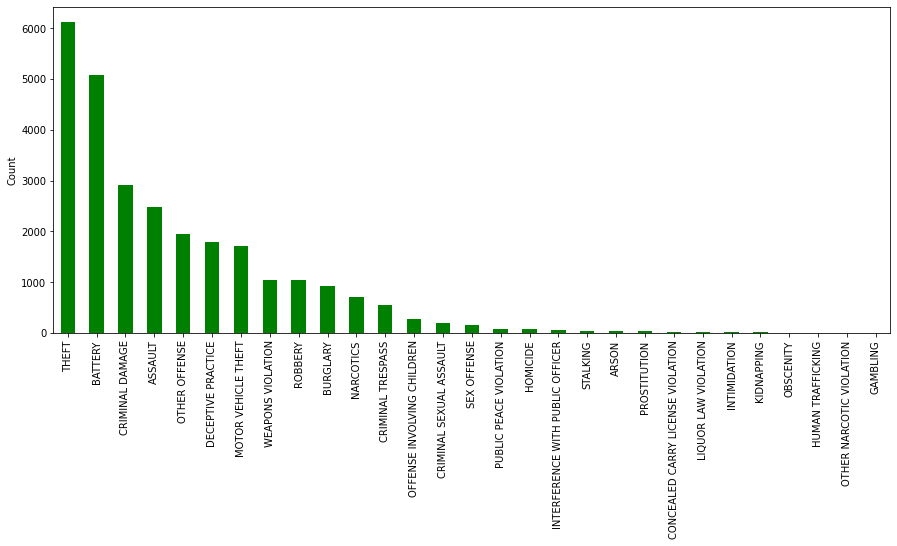

In [145]:
plt.figure(figsize = (15, 6))
df['Primary Type'].value_counts().plot(kind='bar', color='g')
plt.ylabel('Count')

Text(0.5, 0, 'Arrest')

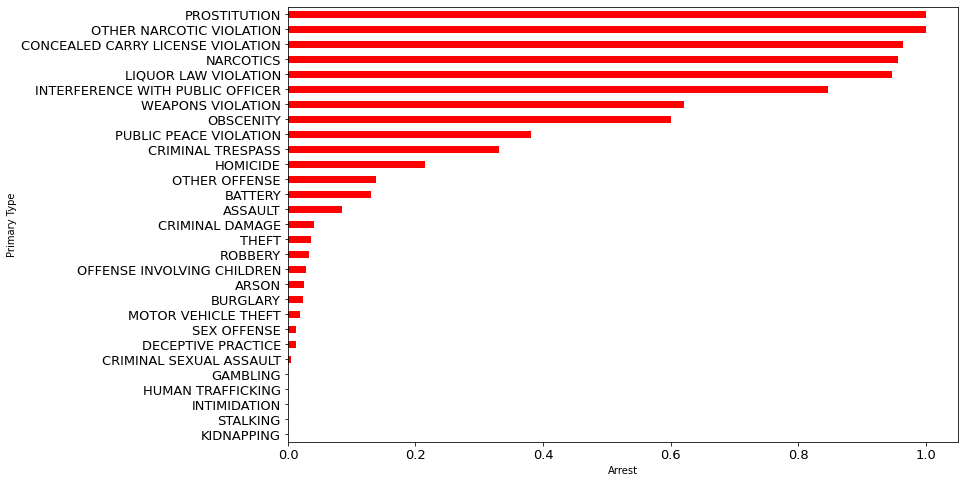

In [146]:
df.groupby(['Primary Type'])['Arrest'].mean().sort_values().plot(kind='barh', figsize=(12,8), fontsize=13, color='red')
plt.xlabel('Arrest')

Text(0.5, 0, 'District')

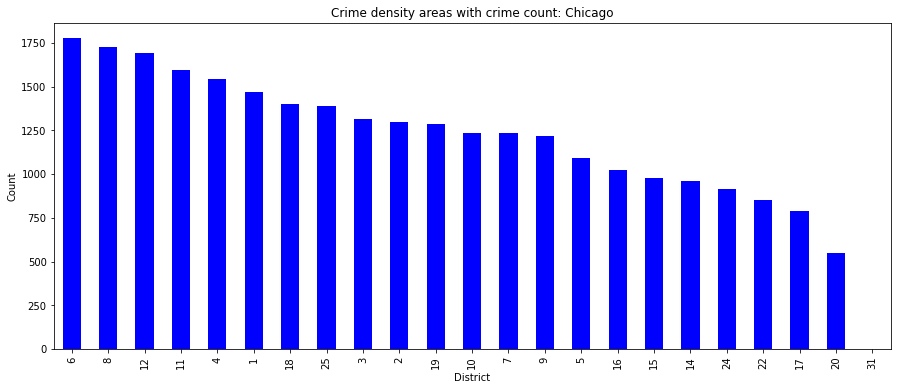

In [147]:
plt.figure(figsize = (15, 6))
df['District'].value_counts().plot(kind='bar', color='b')
plt.title("Crime density areas with crime count: Chicago")
plt.ylabel('Count')
plt.xlabel('District')

# Feature Engineeering

In [148]:
#Check If there is null values
df.isnull().sum()

ID                        2
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description     84
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      4
Community Area            0
FBI Code                  0
X Coordinate            509
Y Coordinate            509
Year                      0
Updated On                0
Latitude                509
Longitude               509
Location                509
dtype: int64

In [149]:
print('the null values just are the',(3209/41604)*100,'% of my data. \nFor this reason I am going to drop all these rows') 

the null values just are the 7.71320065378329 % of my data. 
For this reason I am going to drop all these rows


In [150]:
#size befor dropping null values
df.shape

(27330, 22)

In [151]:
#Drop nan values
df= df.dropna()

In [152]:
#size after dropping nan values
df.shape

(26769, 22)

In [153]:
#Check type of the features
df.dtypes

ID                      float64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area            int64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [154]:
#Convert Date column to Date Time format
df['Date']= pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S %p' , errors='coerce')

In [155]:
#Check the change in the type og the column
df.dtypes

ID                             float64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                   int64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

In [156]:
#Eliminate duplicate rows
df=df.drop_duplicates()

In [157]:
df['Year'].value_counts()

2022    26769
Name: Year, dtype: int64

In [158]:
#Possible target columns 
#Count Unique Values
df['Arrest'].value_counts()

False    23474
True      3295
Name: Arrest, dtype: int64

In [159]:
df['Ward'].value_counts(normalize=True)

27.0    0.050133
42.0    0.049087
28.0    0.042661
24.0    0.038178
6.0     0.034667
21.0    0.033247
8.0     0.031940
7.0     0.031753
17.0    0.031230
3.0     0.031193
4.0     0.030632
20.0    0.029026
16.0    0.027121
9.0     0.027046
37.0    0.026336
5.0     0.025963
34.0    0.025290
25.0    0.024954
29.0    0.024020
1.0     0.018940
49.0    0.016325
10.0    0.016063
26.0    0.015503
46.0    0.015428
2.0     0.015204
15.0    0.014606
22.0    0.014046
44.0    0.013747
41.0    0.013747
14.0    0.013598
36.0    0.013374
18.0    0.013150
11.0    0.012925
12.0    0.012589
48.0    0.012365
31.0    0.012216
40.0    0.011655
50.0    0.011468
23.0    0.011170
32.0    0.011020
39.0    0.010833
45.0    0.010609
30.0    0.010310
43.0    0.009862
13.0    0.009601
35.0    0.009489
33.0    0.009152
47.0    0.009152
19.0    0.009003
38.0    0.008368
Name: Ward, dtype: float64

In [160]:
df['Primary Type'].value_counts(normalize=True)

THEFT                                0.215473
BATTERY                              0.189361
CRIMINAL DAMAGE                      0.107662
ASSAULT                              0.092271
OTHER OFFENSE                        0.072509
MOTOR VEHICLE THEFT                  0.063618
DECEPTIVE PRACTICE                   0.061825
WEAPONS VIOLATION                    0.039112
ROBBERY                              0.038701
BURGLARY                             0.034069
NARCOTICS                            0.026224
CRIMINAL TRESPASS                    0.020135
OFFENSE INVOLVING CHILDREN           0.010161
CRIMINAL SEXUAL ASSAULT              0.007210
SEX OFFENSE                          0.005753
PUBLIC PEACE VIOLATION               0.003138
HOMICIDE                             0.002615
INTERFERENCE WITH PUBLIC OFFICER     0.002204
STALKING                             0.001644
ARSON                                0.001532
PROSTITUTION                         0.001494
CONCEALED CARRY LICENSE VIOLATION 

### I'm going to use Arrest as my target because this categorical feature doesn't have high cardinality

## Check if there are Outliers

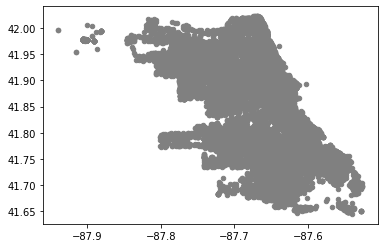

In [161]:
#Visualization of the Longitude and Latitude.
plt.scatter('Longitude', 'Latitude', c='gray', data=df, s=20)

plt.show();

In [162]:
#change true and false by number to plot the data in a map with different colors
df= df.replace({False: 0, True: 1})

In [163]:
fig = px.scatter_mapbox(df, lat='Latitude', lon='Longitude', color='Arrest',hover_name='Primary Type', opacity=0.6)
fig.update_layout(mapbox_style='open-street-map')
fig.show()

# Split data

In [164]:
#Split Data Train/ Validate/Test
#Target = Arrest
target = 'Arrest'
features = df.columns.drop([target,'ID'])

X = df[features]
y = df[target]

X.shape,y.shape

((26769, 20), (26769,))

In [165]:
# Do train/validate/test 3-way split
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, train_size=0.80, test_size=0.20, random_state=42)
X_trainval.shape, X_test.shape, y_trainval.shape, y_test.shape

((21415, 20), (5354, 20), (21415,), (5354,))

In [166]:
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=42)

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_val shape', X_val.shape)
print('y_val shape', y_val.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (17132, 20)
y_train shape (17132,)
X_val shape (4283, 20)
y_val shape (4283,)
X_test shape (5354, 20)
y_test shape (5354,)


**Choosing a Baseline Accuracy for a Classification Model**
When you evaluate a new machine learning model and end up with an accuracy number or other metric, you need to know if it is meaningful. Particularly in imbalanced classification models, it can appear that your model isn’t really doing much better than guessing. What accuracy is enough to call your model useful?

### Get accuracy score for majority class baseline

In [167]:
pd.options.display.float_format = None

In [168]:
y_train.value_counts(normalize=True)

0    0.874912
1    0.125088
Name: Arrest, dtype: float64

In [169]:
y_train.head()

14850    0
15372    0
12841    0
14756    0
10798    0
Name: Arrest, dtype: int64

In [170]:
y_train.mode()

0    0
dtype: int64

In [171]:
#In this case I'm going to calculate the acuracy of the mode of my target using the mode. 
#(mode=is the value that appears most often)

In [172]:
majority_class = y_train.mode()[0] 
y_pred = np.full_like(y_val, fill_value=majority_class)
accuracy_score(y_val, y_pred)

0.8790567359327575

In [173]:
###Get confusion matrix for majority class baseline
plt.rcParams['figure.dpi'] = 150

In [174]:
%matplotlib inline
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

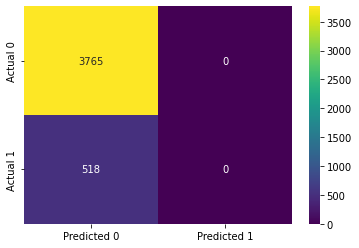

In [175]:
plot_confusion_matrix(y_val, y_pred);

In [176]:
confusion_matrix(y_val, y_pred)

array([[3765,    0],
       [ 518,    0]])

In [177]:
conf_matrix=pd.DataFrame(confusion_matrix(y_val, y_pred))
conf_matrix.index = ['Actual False','Actual True']
conf_matrix.columns = ['Predicted False','Predicted True']
conf_matrix

,Predicted False,Predicted True
Actual False,3765,0
Actual True,518,0


### Get precision & recall for majority class baseline

In [178]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      3765
           1       0.00      0.00      0.00       518

    accuracy                           0.88      4283
   macro avg       0.44      0.50      0.47      4283
weighted avg       0.77      0.88      0.82      4283



# Wrangle data

In [179]:
def wrangle(X):
    X=X.copy()
    #Engineer date-based features

    X['Month'] = X['Date'].dt.month
    X['Day'] = X['Date'].dt.day
    X['Hour'] = X['Date'].dt.hour
   # X['Weekday'] = X['Date'].dt.weekday_name

    X=X.drop(columns=['Date','Updated On'])
    
    return X

In [180]:
X_train=wrangle(X_train)
X_val=wrangle(X_val)
X_test=wrangle(X_test)

In [181]:
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_val shape', X_val.shape)
print('y_val shape', y_val.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (17132, 21)
y_train shape (17132,)
X_val shape (4283, 21)
y_val shape (4283,)
X_test shape (5354, 21)
y_test shape (5354,)


# Fit a Model
#Logistic Regression

In [182]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [183]:
 
'''Logistic Regression is used when the dependent variable(target) is categorical.'''

import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

lr= make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    LogisticRegression(n_jobs=-1,solver='lbfgs', random_state=42, penalty='l2')
    )

lr.fit(X_train, y_train);

### Get accuracy score for LogisticRegression

In [184]:
from sklearn.metrics import roc_auc_score, roc_curve
lr_pred_val = lr.predict(X_val)
lr_pred_test = lr.predict(X_test)
print('Accuracy for the validation data= ',accuracy_score(y_val, lr_pred_val))
print('Accuracy for the test data= ',accuracy_score(y_test, lr_pred_test))

Accuracy for the validation data=  0.8790567359327575
Accuracy for the test data=  0.8815838625326858


In [185]:
from sklearn.metrics import classification_report
print(classification_report(y_val, lr_pred_val))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      3765
           1       0.00      0.00      0.00       518

    accuracy                           0.88      4283
   macro avg       0.44      0.50      0.47      4283
weighted avg       0.77      0.88      0.82      4283



#XGBClassifier

In [186]:

from xgboost import XGBClassifier

xgb = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

xgb.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Case Number', 'Block', 'IUCR',
                                      'Primary Type', 'Description',
                                      'Location Description', 'FBI Code',
                                      'Location'],
                                mapping=[{'col': 'Case Number',
                                          'data_type': dtype('O'),
                                          'mapping': JF159503        1
JF161093        2
JF155128        3
JF159421        4
JF150174        5
            ...  
JF144927    17128
JF144467    17129
JF165671    17130
JF178605    17131
NaN            -2
Length: 17132, dtype: int64},
                                         {'...
(41.749500737, -87.667062179)        3
(41.819599103, -87.601819534)        4
(41.747393001, -87.585438607)        5
                                 ...  
(41.814271027, -87.702957225)    13819
(41.894546069, -87.715064094)    13820
(41.9541

In [187]:
###Get accuracy score for XGBClassifier
xg_pred_val = xgb.predict(X_val)
xg_pred_test = xgb.predict(X_test)
print('Accuracy for the validation data= ',accuracy_score(y_val, xg_pred_val))
print('Accuracy for the test data= ',accuracy_score(y_test, xg_pred_test))

Accuracy for the validation data=  0.9273873453187018
Accuracy for the test data=  0.9286514755323123


In [188]:
from sklearn.metrics import classification_report
print(classification_report(y_val, xg_pred_val))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3765
           1       0.91      0.44      0.60       518

    accuracy                           0.93      4283
   macro avg       0.92      0.72      0.78      4283
weighted avg       0.93      0.93      0.92      4283



# DECISION TREE 

In [189]:
from sklearn.tree import DecisionTreeClassifier
dt = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    DecisionTreeClassifier(random_state=42, max_depth=2)
)

dt.fit(X_train, y_train);

In [190]:
###Get accuracy score for DecisionTreeClassifier
dc_pred_val = dt.predict(X_val)
dc_pred_test = dt.predict(X_test)
print('Accuracy for the validation data= ',accuracy_score(y_val, dc_pred_val))
print('Accuracy for the test data= ',accuracy_score(y_test, dc_pred_test))

Accuracy for the validation data=  0.900303525566192
Accuracy for the test data=  0.9021292491595069


In [191]:
from sklearn.metrics import classification_report
print(classification_report(y_val, dc_pred_val))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3765
           1       0.97      0.18      0.31       518

    accuracy                           0.90      4283
   macro avg       0.93      0.59      0.63      4283
weighted avg       0.91      0.90      0.87      4283



# MLP

In [192]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

clf = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)
)
clf.fit(X_train, y_train)


Iteration 1, loss = 8.01992563
Iteration 2, loss = 7.91054520
Iteration 3, loss = 8.11871359
Iteration 4, loss = 7.70680119
Iteration 5, loss = 8.13561793
Iteration 6, loss = 7.73085754
Iteration 7, loss = 7.86786779
Iteration 8, loss = 7.92108312
Iteration 9, loss = 7.80967344
Iteration 10, loss = 7.95538800
Iteration 11, loss = 7.67005398
Iteration 12, loss = 7.77191372
Iteration 13, loss = 7.83901989
Iteration 14, loss = 7.59530671
Iteration 15, loss = 7.99322253
Iteration 16, loss = 7.80772677
Iteration 17, loss = 7.74024142
Iteration 18, loss = 7.71255110
Iteration 19, loss = 7.99301803
Iteration 20, loss = 7.72337894
Iteration 21, loss = 7.76431451
Iteration 22, loss = 7.96872888
Iteration 23, loss = 7.62712104
Iteration 24, loss = 7.53560457
Iteration 25, loss = 8.19846756
Iteration 26, loss = 7.70345290
Iteration 27, loss = 7.68816811
Iteration 28, loss = 7.73945640
Iteration 29, loss = 7.66508396
Iteration 30, loss = 7.80756143
Iteration 31, loss = 7.66985798
Iteration 32, los

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Case Number', 'Block', 'IUCR',
                                      'Primary Type', 'Description',
                                      'Location Description', 'FBI Code',
                                      'Location'],
                                mapping=[{'col': 'Case Number',
                                          'data_type': dtype('O'),
                                          'mapping': JF159503        1
JF161093        2
JF155128        3
JF159421        4
JF150174        5
            ...  
JF144927    17128
JF144467    17129
JF165671    17130
JF178605    17131
NaN            -2
Length: 17132, dtype: int64},
                                         {'...
(41.819599103, -87.601819534)        4
(41.747393001, -87.585438607)        5
                                 ...  
(41.814271027, -87.702957225)    13819
(41.894546069, -87.715064094)    13820
(41.954178182, -87.677007784)    13821
(41.8579

In [199]:
###Get accuracy score for MLP
mlp_pred_val = clf.predict(X_val)
mlp_pred_test = clf.predict(X_test)
print('Accuracy for the validation data= ',accuracy_score(y_val, mlp_pred_val))
print('Accuracy for the test data= ',accuracy_score(y_test, mlp_pred_test))

Accuracy for the validation data=  0.3857109502685034
Accuracy for the test data=  0.3881210310048562


In [194]:
print(classification_report(y_val, mlp_pred_val))

              precision    recall  f1-score   support

           0       0.91      0.34      0.49      3765
           1       0.13      0.75      0.23       518

    accuracy                           0.39      4283
   macro avg       0.52      0.54      0.36      4283
weighted avg       0.81      0.39      0.46      4283



# Comparision of Accuracy, Precesion, Recall, F1-Score of All 
# Fitting Machine Learning Models


In [195]:
pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


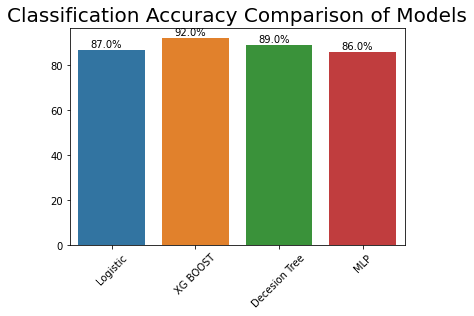

In [196]:
import seaborn as sns
models = ['Logistic','XG BOOST','Decesion Tree','MLP']

scores = [87,92,89,86]

ax = sns.barplot(x=models, y=scores)
ax.set_title('Classification Accuracy Comparison of Models', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))